In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
iris_setosa = data.loc[data['species'] == 'setosa']
iris_versicolor = data.loc[data['species'] == 'versicolor']
iris_virginica = data.loc[data['species'] == 'virginica']

# Histogram of Petal Length for Setosa flowers - Density turned OFF

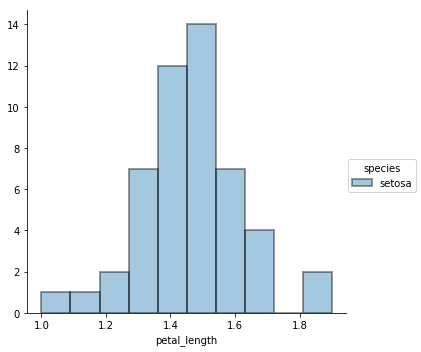

In [4]:
sns.FacetGrid(iris_setosa, hue = 'species', size = 5)\
    .map(sns.distplot, 'petal_length', bins = 10, kde = False, hist_kws=dict(edgecolor="k", linewidth=2))\
    .add_legend()

In [49]:
hist, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10)
print("Histogram values =", hist, "\n\nBin edges =", bin_edges)

Histogram values = [ 1  1  2  7 12 14  7  4  0  2] 

Bin edges = [ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]


** np.histogram(a, bins) returns:**
* The values of the histogram at every bin
* Bin Edges = len(a) + 1

**Below loop explains the above two arrays**

In [30]:
for i in range(len(hist)):
    print("{} setosa flower/s have petal length between {} and {}\n"\
          .format(hist[i], round(bin_edges[i], 2), round(bin_edges[i+1], 2)))

1 setosa flower/s have petal length between 1.0 and 1.09

1 setosa flower/s have petal length between 1.09 and 1.18

2 setosa flower/s have petal length between 1.18 and 1.27

7 setosa flower/s have petal length between 1.27 and 1.36

12 setosa flower/s have petal length between 1.36 and 1.45

14 setosa flower/s have petal length between 1.45 and 1.54

7 setosa flower/s have petal length between 1.54 and 1.63

4 setosa flower/s have petal length between 1.63 and 1.72

0 setosa flower/s have petal length between 1.72 and 1.81

2 setosa flower/s have petal length between 1.81 and 1.9



In [17]:
## Note sum(hist) = 50
sum(hist)

50

**This is because total number of setosa flowers are 50**

**Also Note:<br>
Min value of petal length of setosa is 1<br>
Max value of petal length of setosa is 1.9<br>
Since we have specified 10 bins, the range 1 to 1.9 is divided into 10 equal parts**

# Histogram of Petal Length for Setosa flowers - Density turned ON

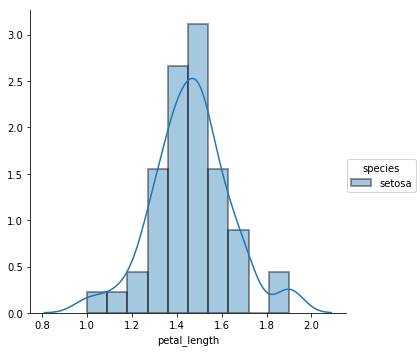

In [19]:
sns.FacetGrid(iris_setosa, hue = 'species', size = 5)\
    .map(sns.distplot, 'petal_length', bins = 10, hist_kws=dict(edgecolor="k", linewidth=2))\
    .add_legend()

In [50]:
hist, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)
print("Histogram values =", hist, "\n\nBin edges =", bin_edges)

Histogram values = [ 0.22222222  0.22222222  0.44444444  1.55555556  2.66666667  3.11111111
  1.55555556  0.88888889  0.          0.44444444] 

Bin edges = [ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]


**Below loop explains the above two arrays**

In [39]:
for i in range(len(hist)):
    print("The probability that a setosa flower has petal length between {1} and {2} is {0}\n"\
          .format(round(hist[i]/sum(hist), 2),\
                  round(bin_edges[i], 2), round(bin_edges[i+1], 2)))

The probability that a setosa flower has petal length between 1.0 and 1.09 is 0.02

The probability that a setosa flower has petal length between 1.09 and 1.18 is 0.02

The probability that a setosa flower has petal length between 1.18 and 1.27 is 0.04

The probability that a setosa flower has petal length between 1.27 and 1.36 is 0.14

The probability that a setosa flower has petal length between 1.36 and 1.45 is 0.24

The probability that a setosa flower has petal length between 1.45 and 1.54 is 0.28

The probability that a setosa flower has petal length between 1.54 and 1.63 is 0.14

The probability that a setosa flower has petal length between 1.63 and 1.72 is 0.08

The probability that a setosa flower has petal length between 1.72 and 1.81 is 0.0

The probability that a setosa flower has petal length between 1.81 and 1.9 is 0.04



**Note: The probability is calculated by calculating the area under the specific bin**

**Also note the sum of all the probabilites is 1, which means sum of the area of all the bins is 1**

**How did we calculate the above probabilities (area under each bin)?**

# Calculating PDF
* PDF for a bin is equal to the area of that bin
* We know that total area of all the bins is 1
* The percentage area of every bin will give its PDF value
* Percentage area = (Area of that bin)/(Total area of all the bins)
* But since the bas of all the bins is same, we can only consider their heights
* Thus, Percentage area = (Height of that bin)/(Total heights of all the bins)
* Hence, PDF can be calculated by normalising the histogram values at every point
* This is nothing but the area under each bin

In [33]:
pdf = hist/sum(hist)
pdf

array([ 0.02,  0.02,  0.04,  0.14,  0.24,  0.28,  0.14,  0.08,  0.  ,  0.04])

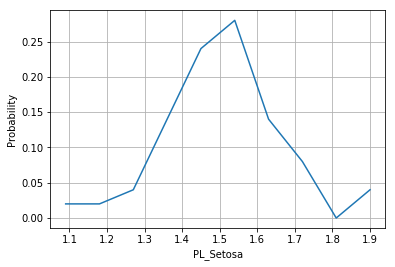

In [47]:
plt.grid()
plt.plot(bin_edges[1:], pdf)
plt.xlabel("PL_Setosa")
plt.ylabel("Probability")

**From PDF we can infer points like:**

Probability that a setosa will have PL as 1.09 is 0.02<br>
Probability that a setosa will have PL as 1.18 is 0.02<br>
Probability that a setosa will have PL as 1.27 is 0.04<br>
and so on...

**By increasing the no of bins we will get a smoother curve as plotted in the sns.distplot() above**

# Calculating CDF

In [45]:
## A cumulative sum of PDF uptil a certain point will give the CDF at that point
cdf = np.cumsum(pdf)
cdf

array([ 0.02,  0.04,  0.08,  0.22,  0.46,  0.74,  0.88,  0.96,  0.96,  1.  ])

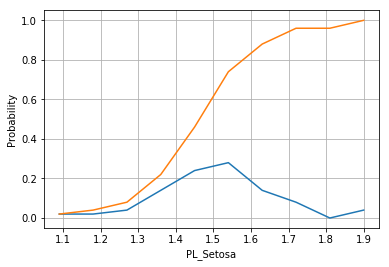

In [48]:
plt.grid()
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("PL_Setosa")
plt.ylabel("Probability")

**From CDF we can infer points like:**

Probability that a setosa will have PL <= 1.09 is 0.02<br>
Probability that a setosa will have PL <= 1.18 is 0.04<br>
Probability that a setosa will have PL <= 1.27 is 0.08<br>
and so on...

**Note in case of CDF the previous probabilities are getting summed up**